In [111]:
from pandas import read_csv, DataFrame
from sklearn.decomposition import FactorAnalysis, PCA

from scripts.dataset_analyse import pca_visualize
from scripts.dataset_preprocessing import scale_dataframe

In [112]:
dataframe = read_csv("../data/cleaned/marketing_campaign_fillna_no_outliers.csv")
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2230 entries, 0 to 2229
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Year_Birth           2230 non-null   int64  
 1   Education            2230 non-null   int64  
 2   Marital_Status       2230 non-null   int64  
 3   Income               2230 non-null   float64
 4   Kidhome              2230 non-null   int64  
 5   Teenhome             2230 non-null   int64  
 6   Dt_Customer          2230 non-null   int64  
 7   Recency              2230 non-null   int64  
 8   MntWines             2230 non-null   int64  
 9   MntFruits            2230 non-null   int64  
 10  MntMeatProducts      2230 non-null   int64  
 11  MntFishProducts      2230 non-null   int64  
 12  MntSweetProducts     2230 non-null   int64  
 13  MntGoldProds         2230 non-null   int64  
 14  NumDealsPurchases    2230 non-null   int64  
 15  NumWebPurchases      2230 non-null   i

In [113]:
dataframe = scale_dataframe(dataframe)
# dataframe.drop(columns=['Marital_Status', 'Education', 'Year_Birth', 'Dt_Customer', 'Teenhome', 'Recency', 'NumDealsPurchases', 'AcceptedCmp3', 'Complain', 'Kidhome', 'NumWebVisitsMonth', 'Income'], inplace=True)

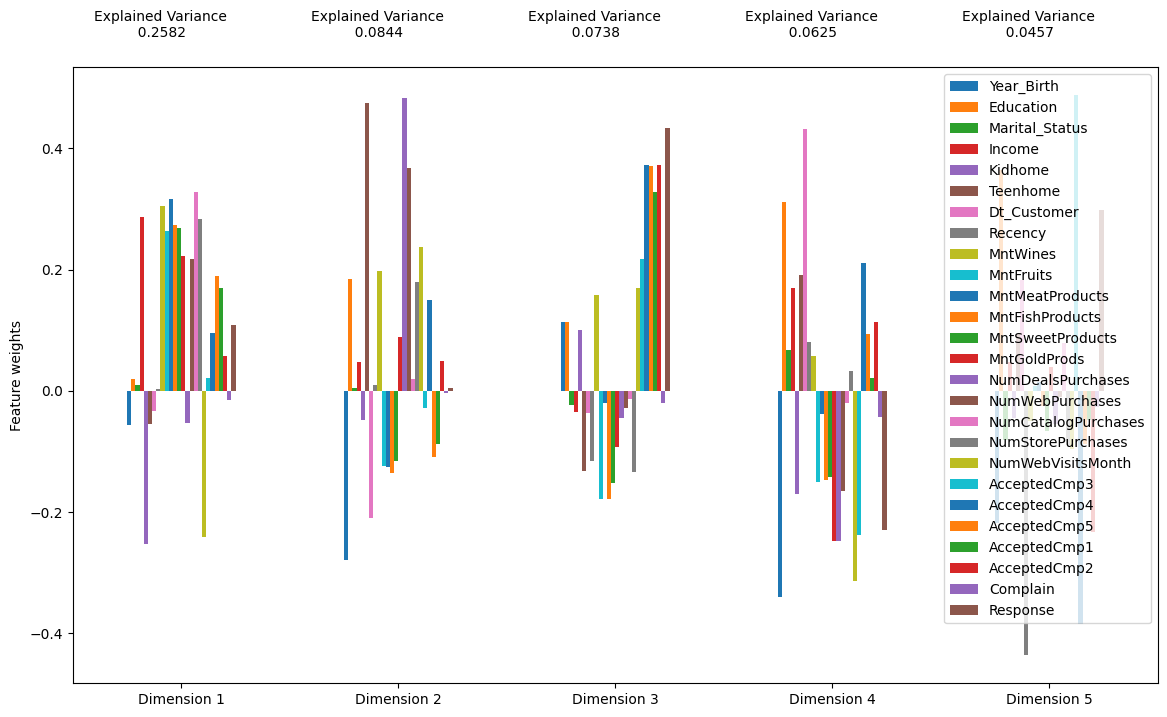

In [114]:
pca = PCA(n_components=5)
pca = pca.fit(dataframe)
pca_visualize(dataframe, pca) #NOTE afficher sous forme de score, et/ou par 2

In [115]:
dataframe.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,-0.984045,-0.348436,0.249432,0.241924,-0.826043,-0.931286,-1.501971,0.305134,0.979380,1.546788,...,2.687376,-0.561268,0.714502,-0.280817,-0.284517,-0.280817,-0.262739,-0.116775,-0.097502,2.382571
1,-1.234559,-0.348436,0.249432,-0.236636,1.030888,0.904936,1.421988,-0.385922,-0.873754,-0.637799,...,-0.592583,-1.179509,-0.132118,-0.280817,-0.284517,-0.280817,-0.262739,-0.116775,-0.097502,-0.419715
2,-0.316007,-0.348436,1.178033,0.788694,-0.826043,-0.931286,-0.039991,-0.800556,0.358698,0.567490,...,-0.228143,1.293454,-0.555429,-0.280817,-0.284517,-0.280817,-0.262739,-0.116775,-0.097502,-0.419715
3,1.270582,-0.348436,1.178033,-1.035913,1.030888,-0.931286,1.421988,-0.800556,-0.873754,-0.562468,...,-0.957022,-0.561268,0.291192,-0.280817,-0.284517,-0.280817,-0.262739,-0.116775,-0.097502,-0.419715
4,1.020068,1.429622,-0.679170,0.248214,1.030888,-0.931286,1.421988,1.549035,-0.392652,0.416829,...,0.136297,0.056972,-0.132118,-0.280817,-0.284517,-0.280817,-0.262739,-0.116775,-0.097502,-0.419715
